In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import numpy as np
from math import pi

In [2]:
from windrose import WindroseAxes, WindAxes, plot_windrose

In [3]:
df = pd.read_csv("samples/sample_wind_poitiers.csv")
df = df.set_index('Timestamp')
df

,speed,direction
Timestamp,,
2011-03-07 17:30:00,3.6,91
2011-03-07 17:40:00,5.6,92
2011-03-07 17:50:00,4.9,92
2011-03-07 18:00:00,2.3,113
2011-03-07 18:10:00,3.2,84
2011-03-07 18:20:00,3.8,96
2011-03-07 18:30:00,2.4,104
2011-03-07 18:40:00,4.6,89
2011-03-07 18:50:00,4.8,92


In [4]:
df['speed_x'] = df['speed'] * np.sin(df['direction'] * pi / 180.0)
df['speed_y'] = df['speed'] * np.cos(df['direction'] * pi / 180.0)

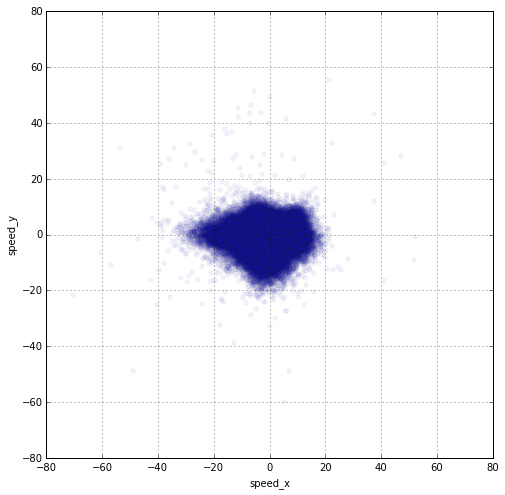

In [5]:
fig, ax = plt.subplots(figsize=(8, 8), dpi=80)
x0, x1 = ax.get_xlim()
y0, y1 = ax.get_ylim()
#ax.set_aspect(abs(x1-x0)/abs(y1-y0))
ax.set_aspect('equal')
#_ = ax.scatter(df['speed_x'], df['speed_y'], alpha=0.25)
_ = df.plot(kind='scatter', x='speed_x', y='speed_y', alpha=0.05, ax=ax)
Vw = 80
_ = ax.set_xlim([-Vw, Vw])
_ = ax.set_ylim([-Vw, Vw])

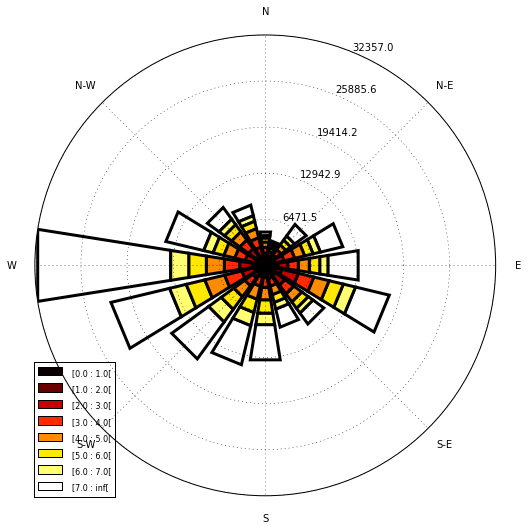

In [6]:
ax = WindroseAxes.from_ax()
ax.bar(df.direction.values, df.speed.values, bins=np.arange(0.01,8,1), cmap=cm.hot, lw=3)
ax.set_legend()

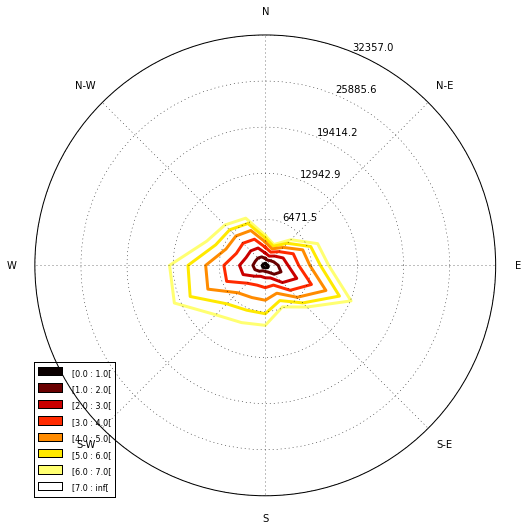

In [7]:
#ax = new_axes()
#plot_windrose(df, bins=np.arange(0.01,8,1), cmap=cm.hot, lw=3, ax=ax)
_ = plot_windrose(df, kind='contour', bins=np.arange(0.01,8,1), cmap=cm.hot, lw=3)

In [8]:
bins = np.arange(0,30+1,1)
bins = bins[1:]
bins

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])

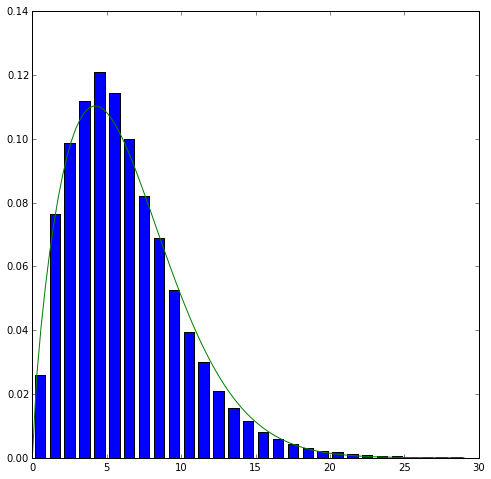

In [9]:
_ = plot_windrose(df, kind='pdf', bins=np.arange(0.01,30,1))

In [10]:
data = np.histogram(df['speed'], bins=bins)[0]
data

array([15377, 20041, 23987, 24356, 24041, 21238, 18007, 14144, 11328,
        8461,  6551,  4625,  3265,  2523,  1749,  1294,   922,   686,
         463,   362,   267,   195,   128,   117,    77,    52,    52,
          40,    29])